# How to Calculate Tolerance Intervals

The size of a tolerance interval is proportional to the size of the data sample from the population and the variance of the population. There are two main methods for calculating tolerance intervals depending on the distribution of data: **parametric** and **nonparametric** methods.

## • Parametric Tolerance Interval
- Use knowledge of the population distribution in specifying both the **coverage** and **confidence**.
- Often used to refer to a **Gaussian distribution**.

## • Nonparametric Tolerance Interval
- Use **rank statistics** to estimate the coverage and confidence.
- Often results in **less precision** (wider intervals) due to the lack of information about the distribution.

In [2]:
# Parametric tolerance interval
from numpy.random import seed, randn
from numpy import mean, sqrt
from scipy.stats import chi2, norm

# Seed the random number generator
seed(1)

# Generate dataset
data = 5 * randn(100) + 50

# Specify degrees of freedom
n = len(data)
dof = n - 1

# Specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop * 100))

# Specify confidence
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob * 100, dof))

# Tolerance
interval = sqrt((dof * (1 + (1 / n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)

# Summarize
data_mean = mean(data)
lower, upper = data_mean - interval, data_mean + interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (
    lower, upper, prop * 100, prob * 100))


Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


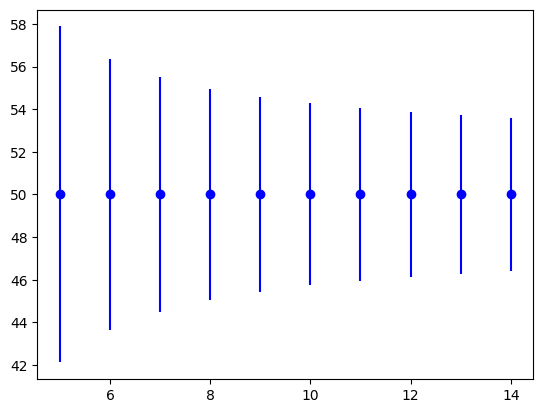

In [2]:
# plot tolerance interval vs sample size
from numpy.random import seed, randn
from numpy import sqrt
from scipy.stats import chi2, norm
from matplotlib import pyplot

# seed the random number generator
seed(1)

# sample sizes
sizes = range(5, 15)

for n in sizes:
    # generate dataset
    data = 5 * randn(n) + 50

    # calculate degrees of freedom
    dof = n - 1

    # specify data coverage
    prop = 0.95
    prop_inv = (1.0 - prop) / 2.0
    gauss_critical = norm.ppf(prop_inv)

    # specify confidence
    prob = 0.99
    prop_inv = 1.0 - prob
    chi_critical = chi2.ppf(prop_inv, dof)

    # tolerance
    tol = sqrt((dof * (1 + (1 / n)) * gauss_critical ** 2) / chi_critical)

    # plot
    pyplot.errorbar(n, 50, yerr=tol, color='blue', fmt='o')

# plot results
pyplot.show()